In [1]:
#%matplotlib notebook
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.animation as animation


Dx=200
Lx=40000
U=10
g=9.8*20/1000
H=400
a=2000
h_mtn = 200
x_0 = Lx/2
T=2000
K=100

Diffusivity = "False" # Options: "True" or "False"
Nonlinear = "False" # If True, non-linear advection added
      
Nx = int(Lx/Dx)
    
Dt = 12
n_plot = 1 

n_timesteps = T/Dt + 1

# Create grid
x = np.arange(0,Lx,Dx)

# Set initial condition
u = np.zeros([Nx, int(n_timesteps)])
h = np.zeros([Nx, int(n_timesteps)])

# Apply initial condition
u[:,0]=U
h[:,0]=H

# Create seamount (note h-points are located Dx/2 ahead of u-points)
h_s = h_mtn*a**2./( (x -x_0)**2 + a**2 )


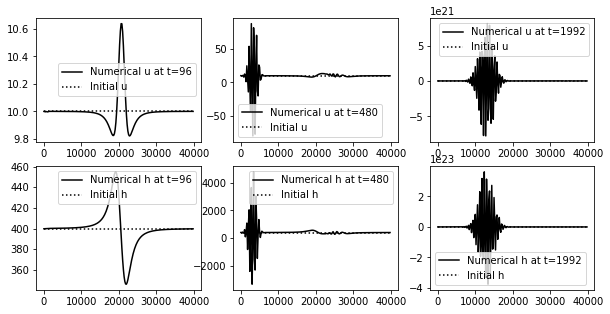

In [2]:
plt.rcParams['figure.figsize'] = [10, 5]
fig, axs = plt.subplots(2, 3)
xpos=0
ypos=0

for time_step in range(1,int(n_timesteps)):
    time = time_step*Dt
    
    # Uncentered/forward time - Centered space
    # Here we assume that points are aranged as h_{j-1} - u_{j} - h_{j} - u_{j+1} etc.
    
    # First solve evolution of velocity: u
    #u[:,time_step] = u[:,time_step-1] - (U*Dt/(2*Dx))*(np.roll(u[:,time_step-1],-1) - \
    #                                                     np.roll(u[:,time_step-1],1)) \
    #                                  - (g*Dt/Dx)*(h[:,time_step-1] - \
    #                                                     np.roll(h[:,time_step-1],1))
    if Nonlinear=="True": # use non-linear advection terms
        u[:,time_step] = u[:,time_step-1] - (u[:,time_step-1]*Dt/Dx)*(u[:,time_step-1] - \
                                                         np.roll(u[:,time_step-1],1)) \
                                      - (g*Dt/Dx)*(h[:,time_step-1] - \
                                                         np.roll(h[:,time_step-1],1))
        h[:,time_step] = h[:,time_step-1] - (u[:,time_step-1]*Dt/Dx)*( (h[:,time_step-1]-h_s) - \
                                                         np.roll( (h[:,time_step-1]-h_s) ,1)) \
                                      - ((h[:,time_step-1]-h_s)*Dt/Dx)*(np.roll(u[:,time_step-1],-1) - \
                                                         u[:,time_step-1])
    else:
        u[:,time_step] = u[:,time_step-1] - (U*Dt/Dx)*(u[:,time_step-1] - \
                                                         np.roll(u[:,time_step-1],1)) \
                                      - (g*Dt/Dx)*(h[:,time_step-1] - \
                                                         np.roll(h[:,time_step-1],1))
        h[:,time_step] = h[:,time_step-1] - (U*Dt/Dx)*( (h[:,time_step-1]-h_s) - \
                                                         np.roll( (h[:,time_step-1]-h_s) ,1)) \
                                      - (H*Dt/Dx)*(np.roll(u[:,time_step-1],-1) - \
                                                         u[:,time_step-1])
        
    # Then solve evolution of height: h
    #h[:,time_step] = h[:,time_step-1] - (U*Dt/(2*Dx))*(np.roll( (h[:,time_step-1]-h_s) ,-1) - \
    #                                                     np.roll( (h[:,time_step-1]-h_s) ,1)) \
    #                                  - (H*Dt/Dx)*(np.roll(u[:,time_step-1],-1) - \
    #                                                     u[:,time_step-1])
    
    if Diffusivity=="True": # Add diffusivity terms
        u[:,time_step] += (K*Dt/(Dx**2))*(np.roll(u[:,time_step-1],-1) - 2*u[:,time_step-1] \
                                         + np.roll(u[:,time_step-1],1))
        h[:,time_step] += (K*Dt/(Dx**2))*(np.roll(h[:,time_step-1],-1) - 2*h[:,time_step-1] \
                                         + np.roll(h[:,time_step-1],1))
        

    if (time==96) or (time==480) or (time==1992):
        axs[ypos,xpos].plot(x, u[:,time_step],'k-',label="Numerical u at t={}".format(time))
        axs[ypos,xpos].legend()
        axs[ypos,xpos].plot(x, u[:,0],'k:',label="Initial u".format(time))
        axs[ypos,xpos].legend()
        ypos=ypos+1
        axs[ypos,xpos].plot(x, h[:,time_step],'k-',label="Numerical h at t={}".format(time))
        axs[ypos,xpos].legend()
        axs[ypos,xpos].plot(x, h[:,0],'k:',label="Initial h".format(time))
        axs[ypos,xpos].legend()
        xpos = xpos+1
        ypos=ypos-1
        
        
plt.show()

In [3]:
#plt.rcParams['figure.figsize'] = [5, 2.5]
#fig, ax = plt.subplots()

#line, = ax.plot(x, u[:,0])

#def animate(i):
#    line.set_ydata(u[:,i])  # update the data.
#    return line,

#ani = animation.FuncAnimation(
#    fig, animate, frames=1000, interval=1, save_count=50)
#plt.show()